# Tuning SARSA agent

1) During the first experiments and tests of our SARSA agent, it was not clear if glei strategy was more efficient than a basic epsilon greedy (strategy whre that we don't decay epsilon through training).  
Therefore, we will first study the differences between the glei and the normal strategies.  
**Results are interesting: they highlight the fact that glei strategy has no advantages (in terms of optimality and speed of convergence) for every epsilon above 0.2 and under 0.001.**  
**However, for epsilon of 0.005 & 0.01, glei strategy converges better and faster**

2) Then, the grid search highlights that the best set of parameter is:
    * Use GLEI strategy
    * starting epsilon: 0.005
    * alpha: 0.1
    * gamma: 1

# Libraries

In [2]:
import os
import sys

# Get the absolute path to the parent folder
parent_folder = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the parent folder to sys.path if it's not already included
if parent_folder not in sys.path:
    sys.path.append(parent_folder)

import gymnasium as gym
import numpy as np
from agents.sarsa import Sarsa
from agents.qlearning import QLearning
from policies.eps_greedy_policy import EpsGreedy
from policies.softmax_policy import Softmax

from utils.encoding import mc_tile_encoding
from utils.utils_fct import plot_moving_averages, process_json

# Testing agent

In [8]:
env = gym.make("MountainCar-v0", render_mode=None)

sarsa_agent = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=EpsGreedy(0.01),
    nb_actions=env.action_space.n,
)

_ = sarsa_agent.train(
    env=env,
    alpha=0.1,
    gamma=1,
    policy_action_params={},
    policy_update_params={"to_decay": True},
    nb_episodes=1000,
    verbose=1,
)
_ = sarsa_agent.evaluate_policy(
    env=env, policy_action_params={"hard_policy": True}, nb_episodes=10, verbose=1
)

Last reward of training -155.0
Average Total Reward over 10 episodes: -113.0


# $\epsilon$-Greedy Sarsa

In [2]:
env = gym.make("MountainCar-v0", render_mode=None)

eps_greedy_sarsa = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=EpsGreedy(0.01),
    nb_actions=env.action_space.n,
)

## 1. Studying the Impact of GLEI Strategy on $\epsilon$-Greedy Policy

In [ ]:
glei_vs_noglei_historic = eps_greedy_sarsa.grid_search(
    env=env,
    alpha=[0.1],
    gamma=[0.99],
    policy_action_params={"epsilon": [0.005, 0.01, 0.05, 0.07, 0.1]},
    policy_update_params={"use_glei": [True, False]},
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
)

process_json(
    "./data/sarsa/eps_greedy/glei_vs_noglei", "w", data_dict=glei_vs_noglei_historic
)

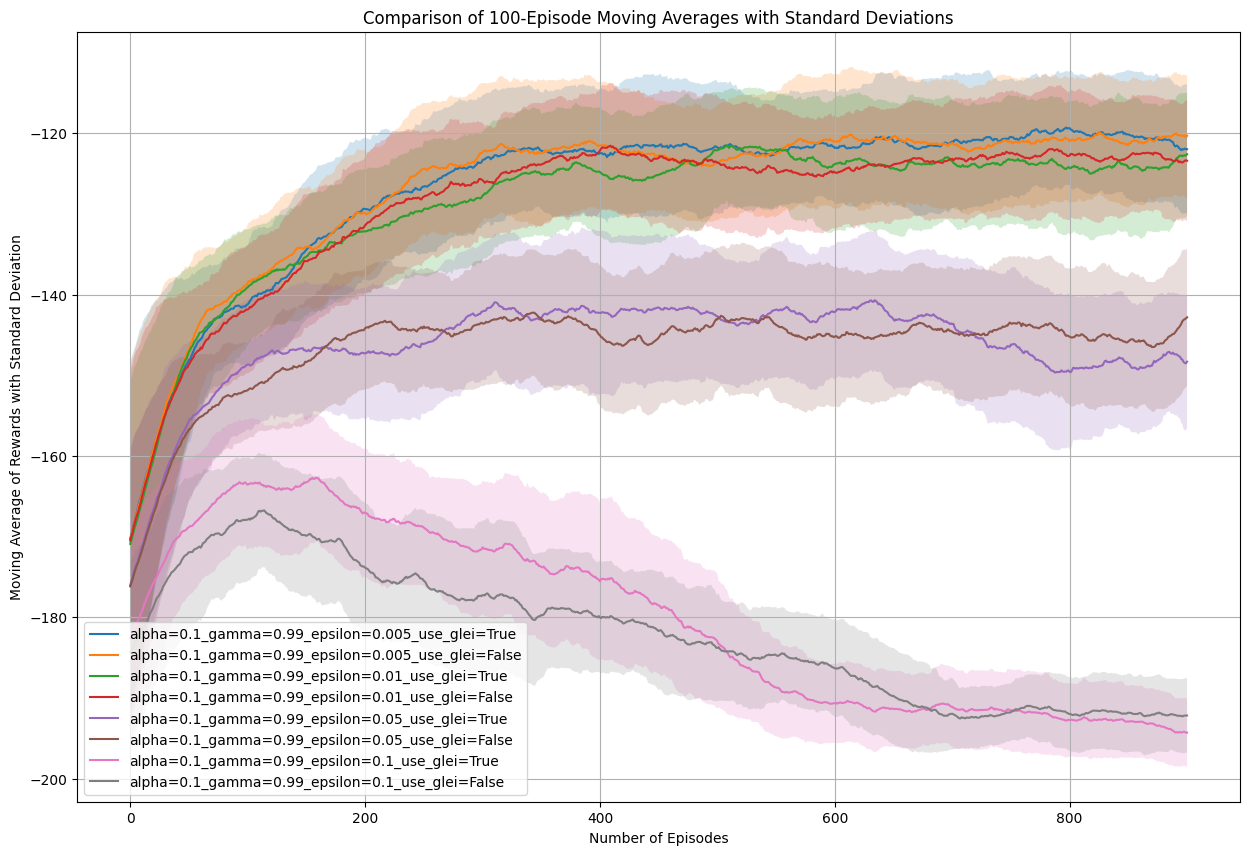

In [ ]:
plot_moving_averages(
    process_json("./data/sarsa/eps_greedy/glei_vs_noglei", "r"),
    nb_episodes=1000,
    window_size=100,
)

## 2. Searching best $\alpha$ and $\gamma$

In [12]:
alpha_gamma_tune_historic = eps_greedy_sarsa.grid_search(
    env=env,
    alpha=[0.005, 0.01, 0.05, 0.07, 0.1],
    gamma=[0.9, 1],
    policy_action_params={"epsilon": [0.005]},
    policy_update_params={"use_glei": [True]},
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
)

process_json(
    "./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true


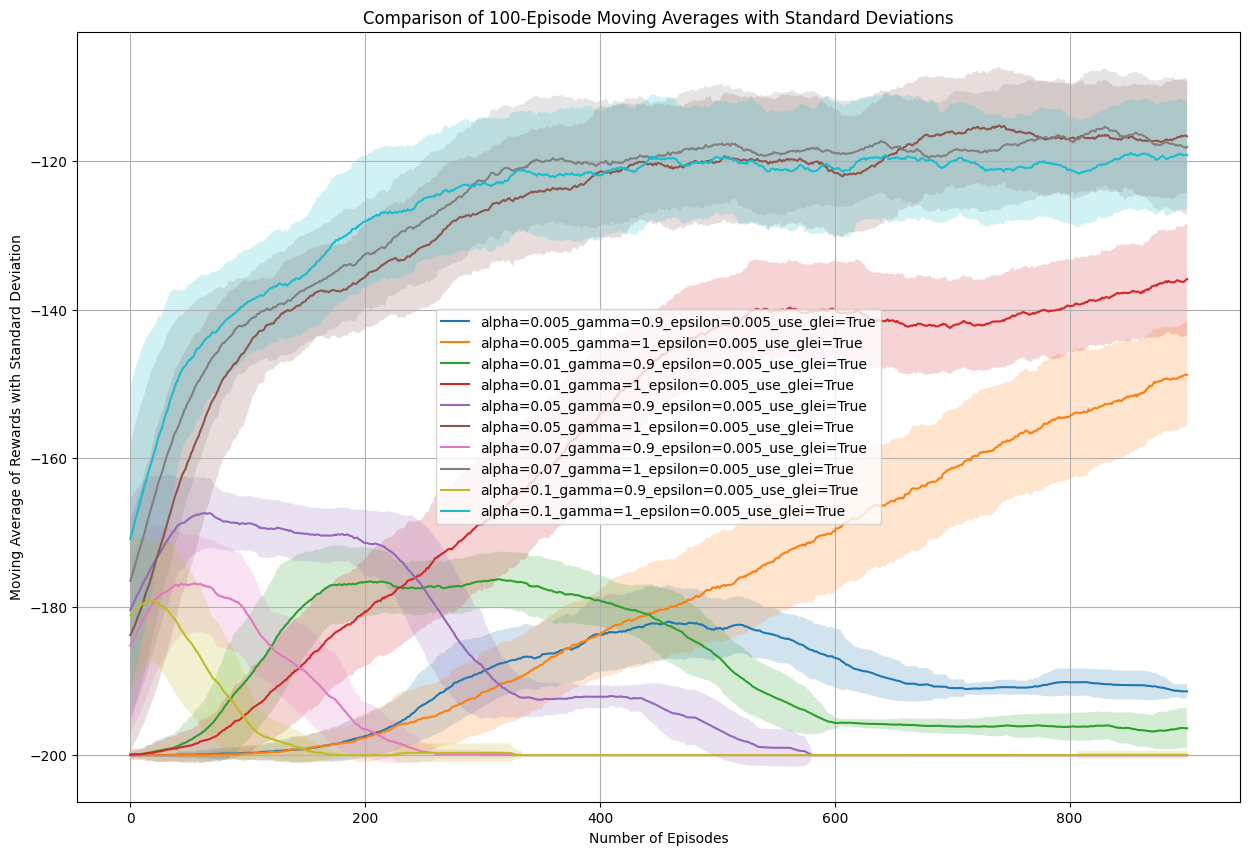

In [13]:
plot_moving_averages(
    process_json(
        "./data/sarsa/eps_greedy/alpha_gamma_search_epsilon=0.005_glei=true", "r"
    ),
    nb_episodes=1000,
    window_size=100,
)

# Softmax Sarsa

In [ ]:
env = gym.make("MountainCar-v0", render_mode=None)

softmax_sarsa = Sarsa(
    encode_fct=mc_tile_encoding,
    policy=Softmax(1),
    nb_actions=env.action_space.n,
)

## 1. Searching best $\alpha$

In [10]:
alpha_gamma_tune_historic = softmax_sarsa.grid_search(
    env=env,
    alpha=[0.005, 0.01, 0.05, 0.07, 0.1, 0.12, 0.15],
    gamma=[1],
    policy_action_params={},
    policy_update_params={},
    nb_episodes=1000,
    nb_iter=10,
    verbose=0,
)

process_json(
    "./data/sarsa/softmax/alpha_search",
    "w",
    data_dict=alpha_gamma_tune_historic,
)

Dictionary saved to ./data/sarsa/softmax/alpha_search


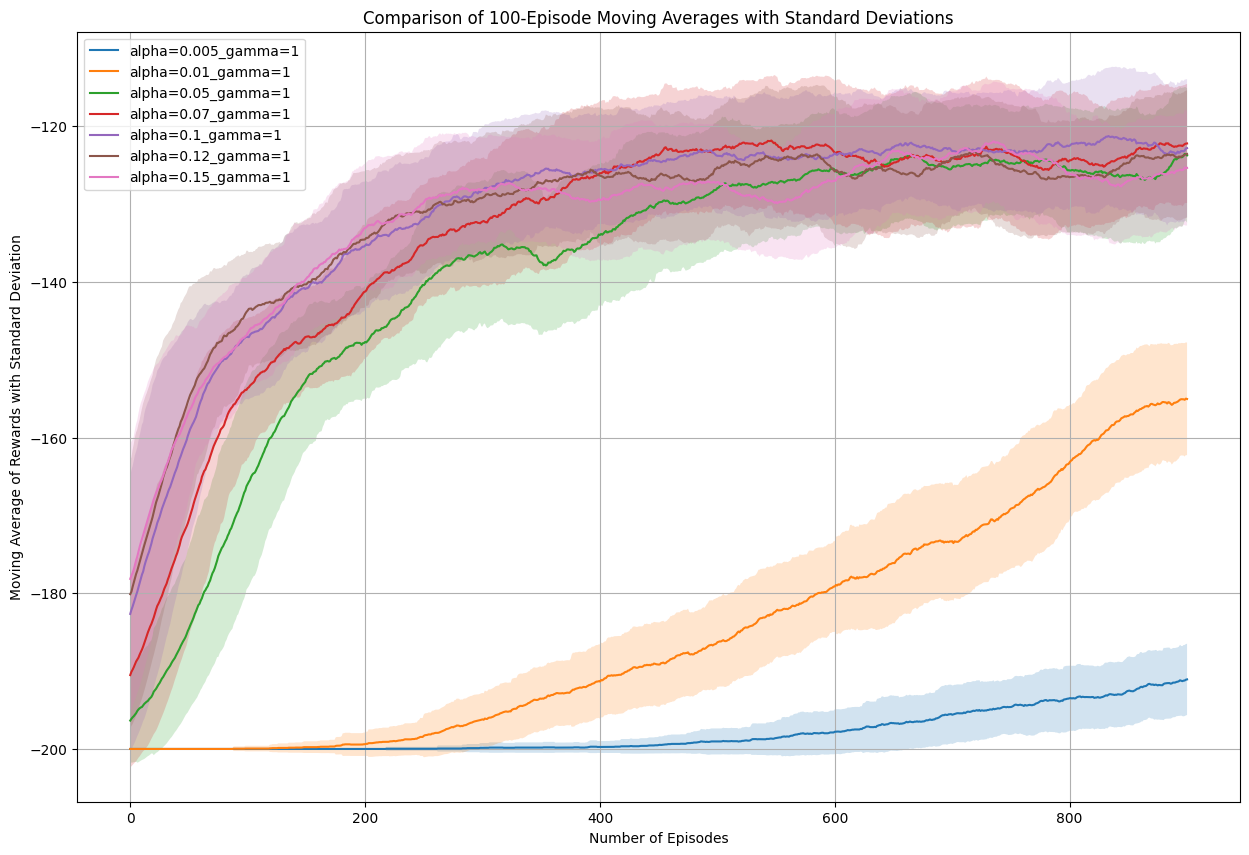

In [11]:
plot_moving_averages(
    process_json("./data/sarsa/softmax/alpha_search", "r"),
    nb_episodes=1000,
    window_size=100,
)